# Customer Churn Analisis |  Daniel Andrade

The dataset to be analyzed in this notebook corresponds to the churn customer data of certain bank. Among the present variables in the dataset it's possible to find information of: 
* The credit score asigned to the customer by the bank.
* The country in which the customer resides. 
* The gender of the customer. 
* The customer age. 
* The time of tenure.
* The number of products by customer.
* The information about if the customer has or hasn't credit card (label as 1 if yes, 0 otherwise), 
* The information about the active status of the customer, 
* The estimated salary of the customer.
* Finally the information of wheater or not the customer left the bank (1 if the customer leaves or 0 if the custumer was retained).

In [2]:
# importing the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set(style="darkgrid")
%matplotlib inline

In [3]:
# importing the file
db = pd.read_csv('Churn_Modelling.csv')

In [4]:
# cheking the structure of the dataset
db.head(n=6)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1


In [5]:
# 10000 rows(customer records) and 13 columns(variables)
db.shape

(10000, 14)

In [6]:
# When describing the dataset it's possible to find useful information as the mean age and credit score of the customer
db.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
# checking for missing values in the dataset
db.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
# Removing identification columns. Those columns are not useful for the analysis
to_remove = ['CustomerId', 'Surname', 'RowNumber']
db.drop(to_remove, axis=1, inplace=True)

# Exploratory Data Analysis (EDA)

## Variable distribution

In order to understand the behavior of leaving customers inour data set, an exploratory data analysis will be done. Starting off the study of different variable distribution.

In the case of the credit score as mentioned before corresponds to the internal score given to the customers, most certainly due to the good behavior with their corresponding products.

As seen the **credit score** has a normal distribution with some negative skew. The mean of the credit score for this dataset is 650.53. With most of the customers in the range of 584-718.

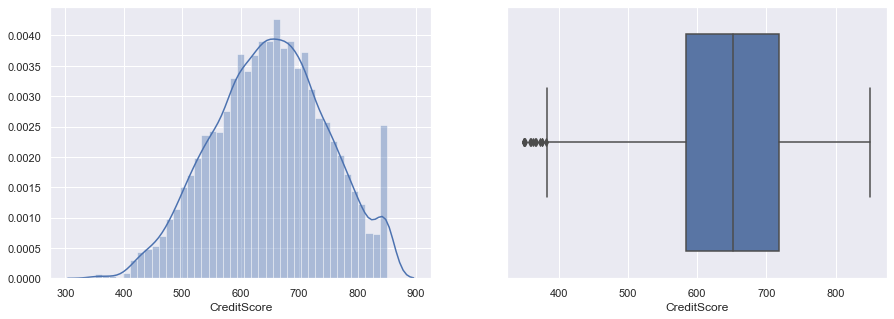

In [83]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.distplot(db['CreditScore'], ax=ax[0])
sns.boxplot(db['CreditScore'], ax=ax[1])

In the case of the **age** is interesting to notice that most of the clients are in the range of 32 to 44 with a mean value of 37 years.

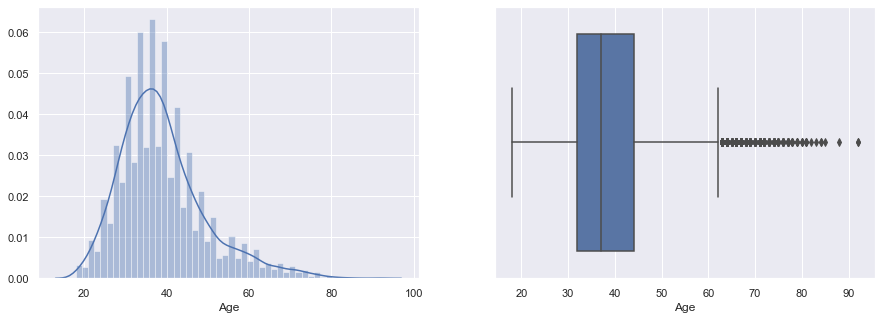

In [86]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.distplot(db['Age'], ax=ax[0])
sns.boxplot(db['Age'], ax=ax[1])

For the **tenure** time, it is possible to notice that the distribution is almost uniform in the range of 1 to 9 years and mean tenure is almost 5 years.

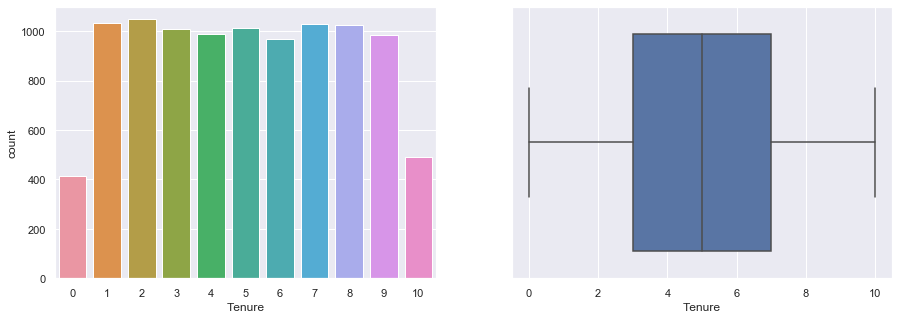

In [93]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot('Tenure', data=db,  ax=ax[0])
sns.boxplot(db['Tenure'], ax=ax[1])

For the case of the **balance** the distribution is normal, except for great quantity of customers with 0 balance.

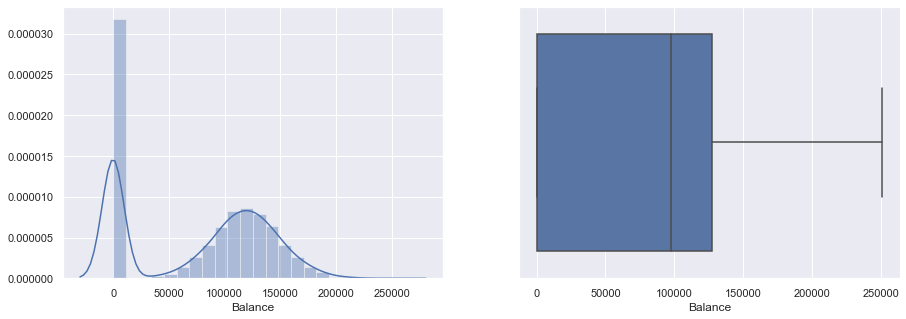

In [100]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.distplot(db['Balance'],  ax=ax[0])
sns.boxplot(db['Balance'], ax=ax[1])

There are 3617 'Balance' records in 0. Could be missing values or actual values, i can't confirm without the dataset source. For now those values will be included in the analysis.

In case those 0's values are actually missing values, they could be removed or cleared via imputation methods.

In [13]:
# counting the values in the 'Balance' columns
db['Balance'].value_counts()

0.00         3617
105473.74       2
130170.82       2
113063.83       1
80242.37        1
             ... 
183555.24       1
137648.41       1
112689.95       1
115465.28       1
74681.90        1
Name: Balance, Length: 6382, dtype: int64

In the case of our dataset most of the customers have between 1 and 2 products in the bank. The mean is 1.5 products per customer.

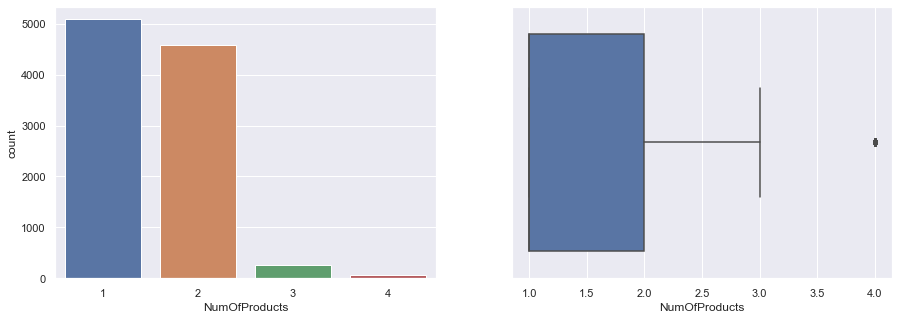

In [101]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot('NumOfProducts', data=db,  ax=ax[0])
sns.boxplot(db['NumOfProducts'], ax=ax[1])

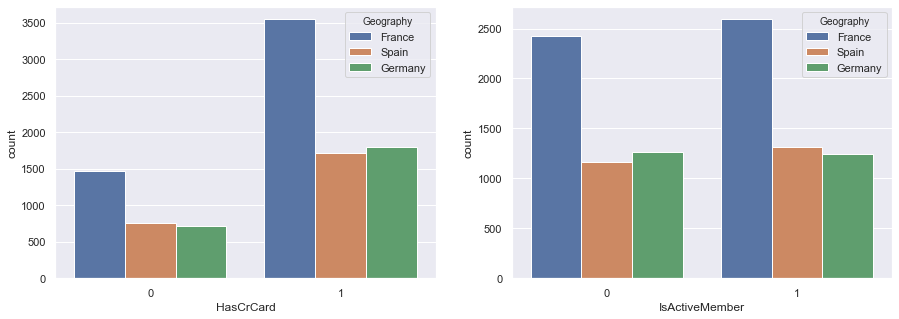

In [131]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(x='HasCrCard', hue='Geography', data=db, ax=ax[0])
sns.countplot(x='IsActiveMember', hue='Geography', data=db, ax=ax[1])

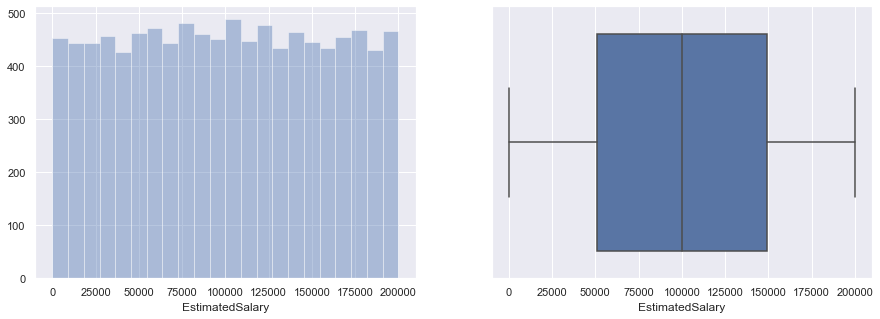

In [110]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.distplot(db['EstimatedSalary'], kde=False, ax=ax[0])
sns.boxplot(db['EstimatedSalary'], ax=ax[1])

0    7963
1    2037
Name: Exited, dtype: int64

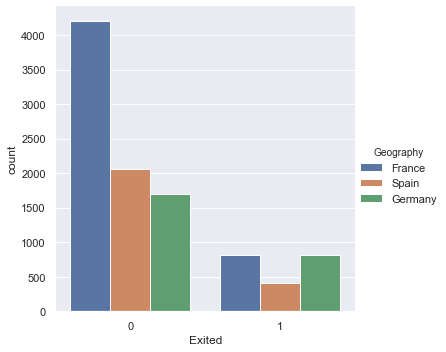

In [18]:
sns.catplot(x = 'Exited', kind = 'count',hue = 'Geography', data=db)
db.Exited.value_counts()

## Exited relation with other variables

The is no relation between the credit score of the customer and if the customer leaves the bank or stay. As seen in the next graphics the customers that leaves have almost the same mean credit score, same behavior across all the countries in the dataset.


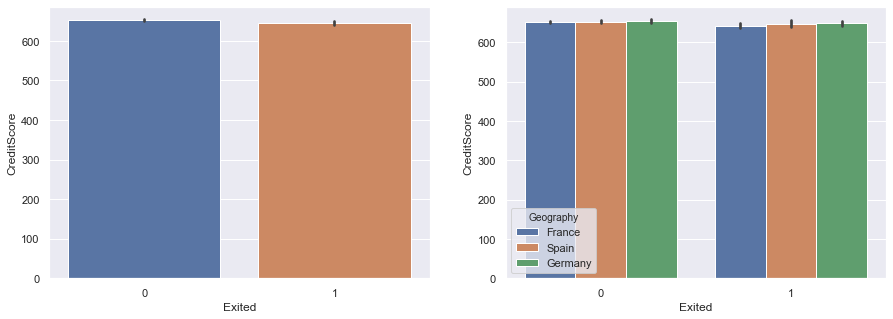

In [112]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(x='Exited', y='CreditScore',  data=db, ax=ax[0])
sns.barplot(x='Exited', y='CreditScore', hue = 'Geography',  data=db,ax=ax[1])

That is diferent for the case of the age of the customer as can notice in the following graphics the customers who leaves the bank is older in average that the customers that decide to stay in the bank.

As for the country distribution for the customers who leaves the bank, its worth to mention for example that in Spain less peple leaves the bank in constrast with Germany in wich country more customers leaves in comparison with Spain. Same case with France, but here its important to note that the dataset has more records from France than other countries.

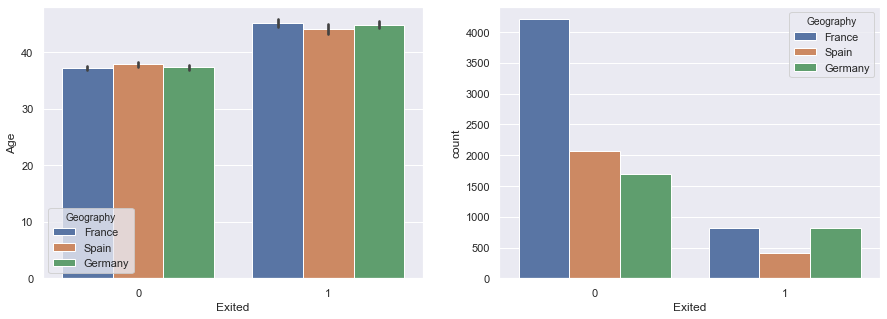

In [113]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(x='Exited', y='Age', hue='Geography', data=db, ax=ax[0])
sns.countplot(x='Exited', hue='Geography', data=db, ax=ax[1])

In the case of **Balance** and the relation with either the customer leaves or not in the Germany case it doesn't seen to be a relation as for both cases (leaves or not) the Balance of the customer it is almost the same. In the case of Spain and France this does not seems to be the case as the mean balance of those who leaves is a little bit higher og those who does not leave. This will be clarified later when the correlation matrix is shown.

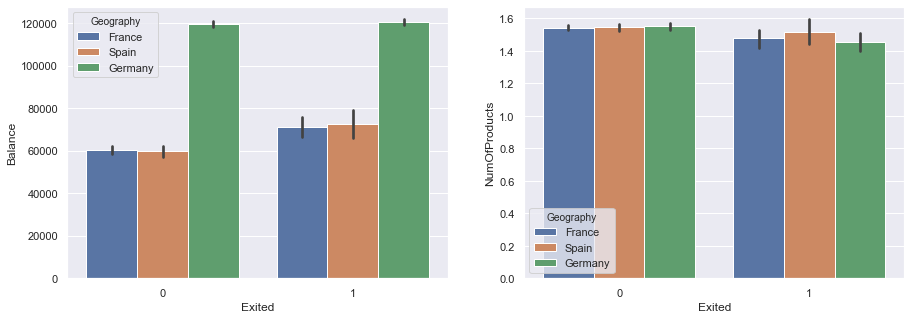

In [114]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(x='Exited', y='Balance', hue='Geography',  data=db, ax=ax[0])

In the case of tenure of the customer in the bank it is almost the same for both cases and for the case in which the customer has credit card or not the relation seems to be the same for both cases of those who leaves and has CC and those does not leave and dont own a CC. This will be corroborated with the correlation matrix.

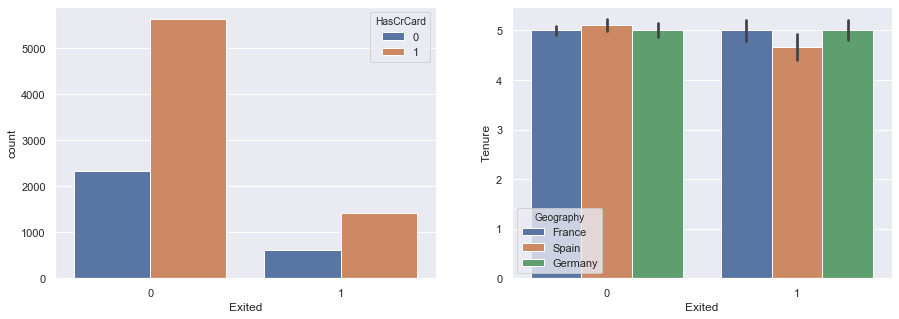

In [132]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(x='Exited', hue='HasCrCard', data=db, ax=ax[0])
sns.barplot(x='Exited', y='Tenure', hue = 'Geography',  data=db, ax=ax[1])

In the next table it is possible to compare the mean value of the main variables when are grouped by geography and exited.

In [27]:
db.groupby(['Exited', 'Geography']).mean()

CreditScore        Age    Tenure        Balance  \
Exited Geography                                                    
0      France      651.162226  37.235966  5.005471   60339.275678   
       Germany     653.261357  37.311504  5.011799  119427.106696   
       Spain       652.104167  37.839147  5.107558   59678.070470   
1      France      641.914815  45.133333  5.000000   71192.795728   
       Germany     647.689189  44.894349  5.006143  120361.075590   
       Spain       647.484262  44.147700  4.656174   72513.352446   

                  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
Exited Geography                                                             
0      France          1.541389   0.707422        0.545433     99217.097331  
       Germany         1.551032   0.716224        0.561652    102414.657876  
       Spain           1.544574   0.699128        0.567345     98602.369864  
1      France          1.476543   0.702469        0.367901    103439.278296  
       Germany         1.454545   0.708845        0.363636     98403.886450  
       Spain           1.513317   0.673123        0.341404    103629.554818

It is worth to say that in the case of age the mean age for those who leaves are almost the same for each country in the dataset.

In the case of the distribution of Exited according to the country some insights are worth to mention:
* The dataset has more records for France than the other countries.
* Germany seems to have more people leaving the bank along with France.

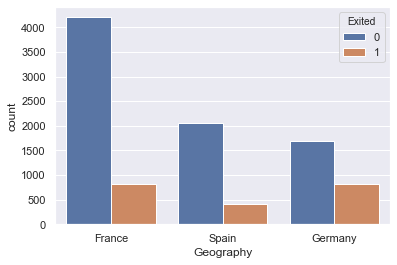

In [118]:
sns.countplot(x='Geography', hue='Exited', data=db)

### Correlation Matrix

The next matrix show us the correlation values among all the numerical variables. 

In [36]:
db.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


An easy way to see interpret this matrix is using a heatmap with the values of the matrix.

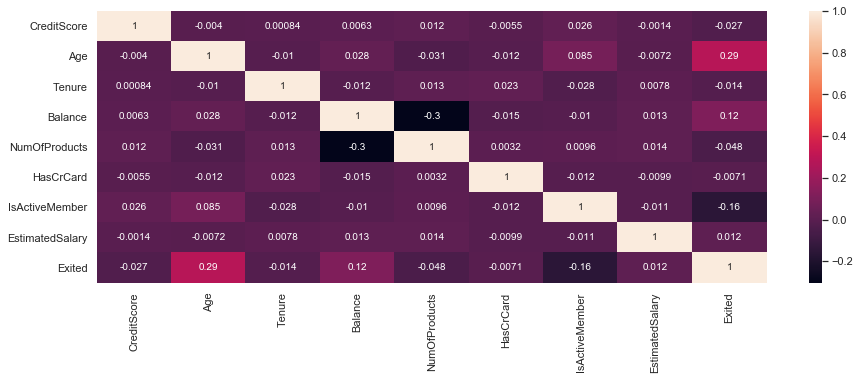

In [37]:
plt.figure(figsize=(15,5))
sns.heatmap(db.corr(), annot=True)

As first insigh we notice that the age variable and the exited variable have a positive correlation of 0.29. This implies that older the customer is more likeable to leave the bank.

Also a not so strong correlation (0.12) between Balance and Exited is found but exist. The more the balance of the account of the respective customer its more likeable to leave the bank.

The is a negative correlation between NumOfProfucts and Balance. This implies that for less number of products greater the balance of the custumer.

## From categorical to numerical data: Dummy variables

Some of the variables in the dataset are not numerical this implies that the correlation with those variables and the rest is not calculated with the correlation matrix of before. One approach to this situation is to convert all the categorical data to a numerical representation. This is done via dummy variables.

For the case of gender the dummy variable will be 0 if the categorical value is female and the other dummy variable will be 1 if the gender is Male.

In [46]:
# Gender: from categorical to numerical values.\
db['Gender'].replace('Female',0,inplace=True)
db['Gender'].replace('Male',1,inplace=True)

In [133]:
# checking the dataset
db

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


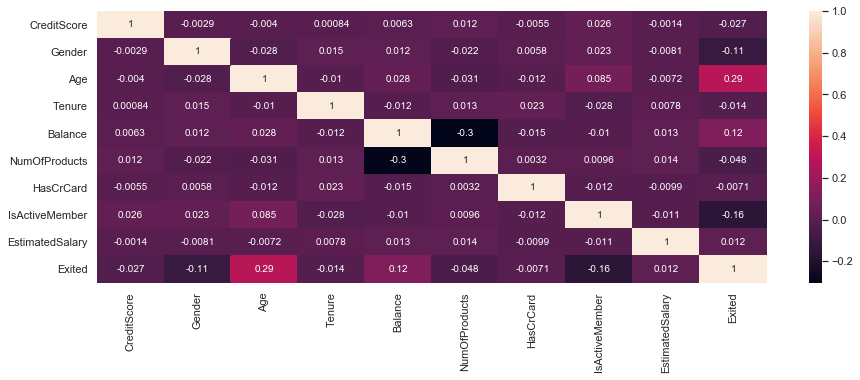

In [134]:
# checking again the correlation matrix
plt.figure(figsize=(15,5))
sns.heatmap(db.corr(), annot=True)

This time Gender is taking into account for the correlation matrix. A negative correlation is found (0.11) that means that if the value is 0 (female) the exited variable will be 1 (the customer leaves).

In [135]:
#Country variable to dummy
db_with_dummies = pd.get_dummies(db, prefix='C_', columns=['Geography'])

In [50]:
db_with_dummies

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,C__France,C__Germany,C__Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0,1,0


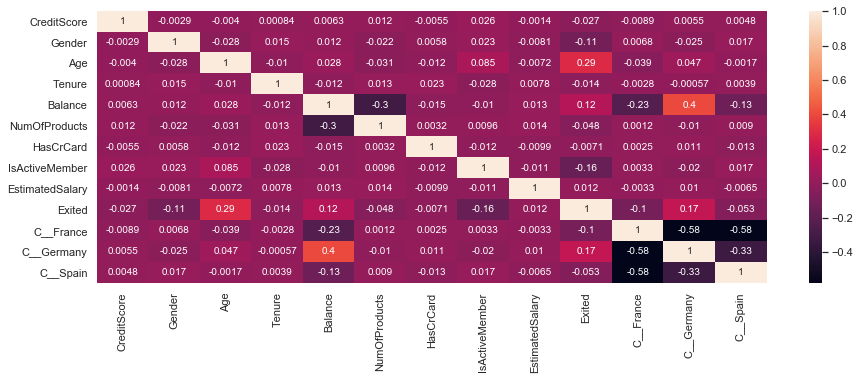

In [136]:
# Correlation matrix heatmap with all numerical variables
plt.figure(figsize=(15,5))
sns.heatmap(db_with_dummies.corr(), annot=True)

Finally doing a recap and analysing the final correlation matrix it is possible to conclude:
* Exited (wheater or not the customer leaves) have correltion with: Age, Gender, Country (Germany and France) and Balance.


# Predictive model using Logistic Regresion and XGBoost: Improving the accuracy.

### Logistic Regresion
A predictive model of customer leaving the bank is made using the logistic regresion model. This is done as first aproximation with no scaling of the data.

In [52]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

In [53]:
y0 = db_with_dummies["Exited"]
y = db_with_dummies["Exited"].values
X = db_with_dummies.drop(labels = ["Exited"],axis = 1)

In [54]:
y

array([1, 0, 1, ..., 1, 1, 0])

In [55]:
X

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,C__France,C__Germany,C__Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,1,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,1,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,0,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,0,1,0


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [57]:
y_train 

array([0, 0, 0, ..., 0, 0, 0])

In [58]:
lr = LogisticRegression()
model=lr.fit(X_train, y_train)

In [59]:
prediction_test = model.predict(X_test)

In [60]:
prediction_test

array([0, 0, 0, ..., 0, 0, 0])

In [61]:
print(metrics.accuracy_score(y_test, prediction_test))

0.7828


The accuracy of this aproximation is 78.28%

In [62]:
weights = pd.Series(model.coef_[0], index=X.columns.values)
weights.sort_values(ascending = False)

Age                0.043836
C__Germany         0.000957
Balance            0.000004
EstimatedSalary   -0.000001
HasCrCard         -0.000106
C__Spain          -0.000325
NumOfProducts     -0.000329
C__France         -0.000812
Gender            -0.001004
IsActiveMember    -0.001304
Tenure            -0.001770
CreditScore       -0.005105
dtype: float64

**The weights of the predictor variables are calculated. In this case Age, country (Germany) and balance are the most important variables for this model in concordance with the previous analysis.**

## Cross-validation
A cross validation model is constructed to improve the accuracy of the model. Lets see if this works.

In [137]:
# Cross validation with 5 iterations
scores = cross_val_score(lr, X, y, cv=5)
scores

array([0.7915, 0.791 , 0.7905, 0.789 , 0.7885])

In [64]:
print("Accuracy: %0.4f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.7901 (+/- 0.00)


Only 1% of improvement.

## Scaling the data
In this case the predictor variables are scaled so the mean its near to 0 and the standard deviation is 1. This improves the learning time of the algorithm and scales the data so the range of all variables are in the same order this improves calculations.

In [144]:
from sklearn.preprocessing import scale
Xs = scale(X)
Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y, test_size=0.2, random_state=123)
lr_2 = lr.fit(Xs_train, y_train)
prediction_test2 = lr_2.predict(Xs_test)

In [145]:
print(metrics.accuracy_score(y_test, prediction_test2))

0.813


Almost 2% of improvement.

### CV with scaling

In this stage the logistic regresion is made doing cross validation with the scaled values.

In [67]:
scores2 = cross_val_score(lr_2, Xs, y, cv=5)
scores2

array([0.811 , 0.8085, 0.8085, 0.818 , 0.802 ])

In [68]:
print("Accuracy: %0.4f (+/- %0.4f)" % (scores2.mean(), scores2.std() * 2))

Accuracy: 0.8096 (+/- 0.0103)


In [ ]:
Almost no improvement.

## XGBoost

XGBoost its implemented with logistic regresion to compare the accuracy with the previous implemetations.

In [69]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [70]:
data_dmatrix = xgb.DMatrix(data=X,label=y0)

In [71]:
params = {"objective":"reg:logistic", "max_depth":3}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, 
                  nfold=5, num_boost_round=10, 
                  metrics="error", as_pandas=True, seed=123)

In [72]:
print(cv_results)

# Print the accuracy
print(((1-cv_results["test-error-mean"]).iloc[-1]))

   train-error-mean  train-error-std  test-error-mean  test-error-std
0          0.159150         0.001261           0.1611        0.005987
1          0.149975         0.005726           0.1538        0.005212
2          0.143875         0.002856           0.1465        0.005486
3          0.143325         0.001781           0.1452        0.010112
4          0.142150         0.002384           0.1445        0.010237
5          0.141450         0.002658           0.1433        0.009363
6          0.140650         0.001860           0.1433        0.008841
7          0.139150         0.001528           0.1430        0.007765
8          0.138150         0.001271           0.1433        0.007146
9          0.138375         0.001202           0.1419        0.006938
0.8581


In this case the accuracy is 85.81% the best value so far.